In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.cluster import KMeans

In [20]:
df = pd.read_csv('/Users/flock/Documents/ML/Kmeans/College.csv')

In [22]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 19 columns):
Unnamed: 0     776 non-null object
Private        776 non-null object
Apps           776 non-null int64
Accept         776 non-null int64
Enroll         776 non-null int64
Top10perc      776 non-null int64
Top25perc      776 non-null int64
F.Undergrad    776 non-null int64
P.Undergrad    776 non-null int64
Outstate       776 non-null int64
Room.Board     776 non-null int64
Books          776 non-null int64
Personal       776 non-null int64
PhD            776 non-null int64
Terminal       776 non-null int64
S.F.Ratio      776 non-null float64
perc.alumni    776 non-null int64
Expend         776 non-null int64
Grad.Rate      776 non-null int64
dtypes: float64(1), int64(16), object(2)
memory usage: 115.3+ KB


In [24]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,3001.654639,2019.015464,780.087629,27.557990,55.787371,3700.824742,854.176546,10447.693299,4358.554124,549.444588,1340.759021,72.657216,79.708763,14.084536,22.737113,9666.809278,65.420103
std,3872.697557,2452.687758,929.769965,17.651734,19.815859,4853.481370,1523.092275,4020.840763,1097.029256,165.202310,677.500299,16.338469,14.730884,3.958278,12.398354,5221.854692,17.146468
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.000000
25%,776.000000,603.250000,242.000000,15.000000,41.000000,991.000000,95.000000,7338.000000,3597.750000,469.500000,850.000000,62.000000,71.000000,11.500000,13.000000,6755.500000,53.000000
50%,1557.500000,1109.500000,434.000000,23.000000,54.000000,1707.000000,352.500000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8392.500000,65.000000
75%,3629.500000,2428.000000,902.250000,35.000000,69.000000,4030.250000,964.000000,12931.250000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10838.500000,78.000000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.000000


/Users/flock/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


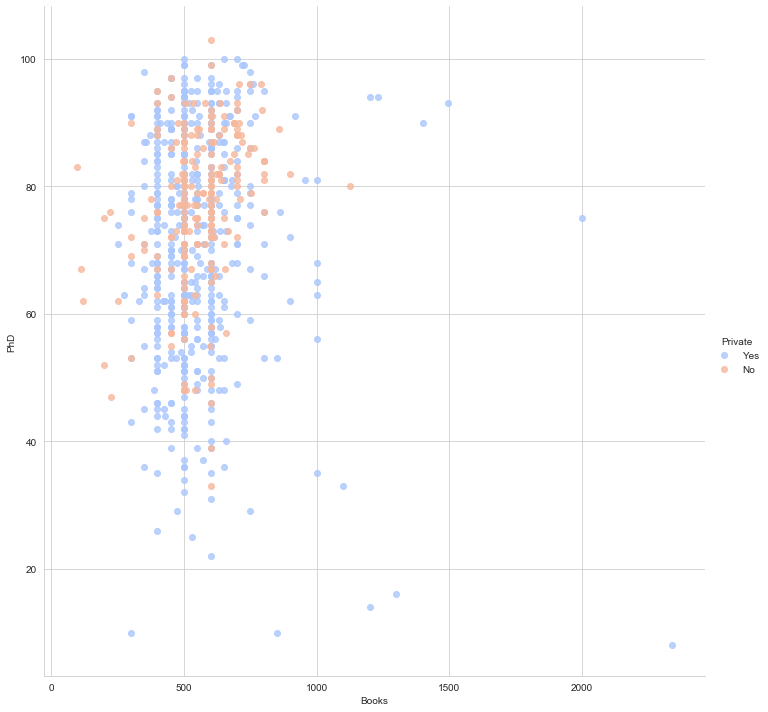

In [25]:
sb.set_style('whitegrid')
sb.lmplot('Books', 'PhD', data=df, hue='Private', palette = 'coolwarm', size=10, aspect=1, fit_reg=False)

/Users/flock/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


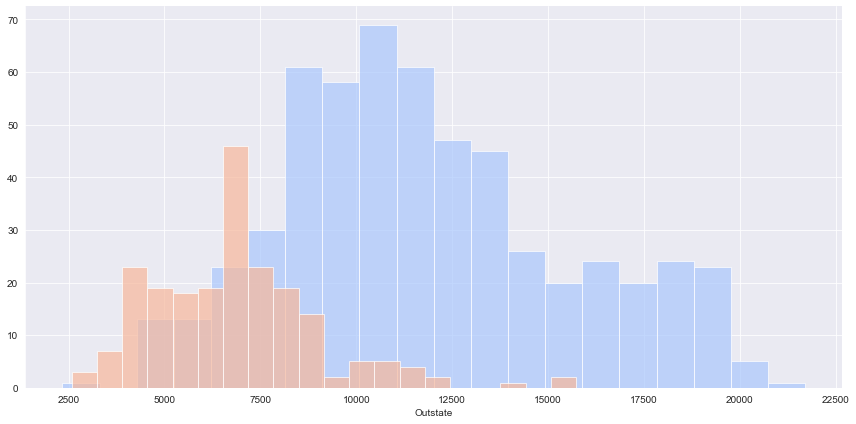

In [26]:
sb.set_style('darkgrid')
graph = sb.FacetGrid(df, hue='Private', palette='coolwarm', size=6, aspect=2)
graph = graph.map(plt.hist, 'Outstate', bins=20, alpha=0.7)

In [27]:
df[df['Outstate'] > 20000]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
47,Bennington College,Yes,519,327,114,25,53,457,2,21700,4100,600,500,35,59,10.1,33,16364,55
354,Massachusetts Institute of Technology,Yes,6411,2140,1078,96,99,4481,28,20100,5975,725,1600,99,99,10.1,35,33541,94


In [29]:
kmeans = KMeans(n_clusters=2)
x = df.drop('Private', axis=1)
x = x.drop(df.columns[0], axis=1)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
kmeans.cluster_centers_

array([[1.81147455e+03, 1.28631587e+03, 4.90745509e+02, 2.53053892e+01,
        5.34565868e+01, 2.18735180e+03, 5.93766467e+02, 1.04038009e+04,
        4.31248952e+03, 5.42044910e+02, 1.28038174e+03, 7.04356287e+01,
        7.78293413e+01, 1.40937126e+01, 2.31676647e+01, 8.93866766e+03,
        6.50688623e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

In [31]:
def converter(cluster):
    if cluster == 'Yes':
        return 1
    else:
        return 0

In [32]:
df['cluster'] = df['Private'].apply(converter)
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,cluster
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [35]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(df['cluster'], kmeans.labels_))
print(classification_report(df['cluster'], kmeans.labels_))

[[138  74]
 [530  34]]
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       564

    accuracy                           0.22       776
   macro avg       0.26      0.36      0.21       776
weighted avg       0.29      0.22      0.16       776

